<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/logistic_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class Logistic_Regression:
    def __init__(self, features):
        # for b
        self.w = np.zeros((1, features + 1))
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def call(self, X):
        #      x.shape = (N, f)
        #      w.shape = (1, f)
        # output.shape = (N, 1)
        # ((1, f) * (f, N)).T = (N, 1) => (w * x.T).T
        # (N, f) * (f, 1) = (N, 1) => x * w.T
        
        inner_X = np.hstack(
            (
                X, 
                np.ones((X.shape[0], 1))
            )
        )
        z = np.dot(inner_X, self.w.T)
        return self.sigmoid(z)
        
    def get_CE_error(self, X, y):
        h = self.call(X)
        return np.mean(-y * np.log(h) - (1 - y) * np.log(1 - h))
    
    def get_CE_derivatives(self, X, y):
        inner_X = np.hstack((X, np.ones((X.shape[0], 1))))
        h = np.dot(inner_X, self.w.T)
        # (y - h).shape = (N, 1)
        #       X.shape = (N, f)
        #  output.shape = (1, f)
        # (1, N) * (N, f) => (1, f) *faster
        # ((f, N) * (N, 1)).T => (1, f)
        return -np.dot((y - h).T, inner_X) / y.shape[0]
    
    def fit(self, X, y, alpha, itterations):
        for i in range(itterations):
            der = self.get_MSE_derivatives(X, y)
            self.w = self.w - alpha * der

In [2]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 11), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.
/content/Machine-Learning


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
# df.Age[df['Purchased'] == 1]
df[df['Purchased'] == 1]['Age']

7      32
16     47
17     45
18     46
19     48
       ..
393    60
395    46
396    51
397    50
399    49
Name: Age, Length: 143, dtype: int64

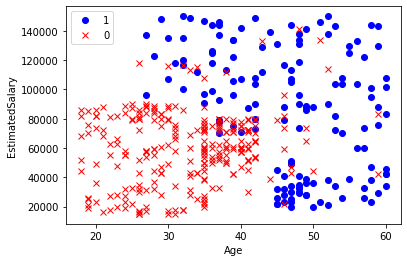

In [9]:
plt.plot(df[df['Purchased'] == 1]['Age'],
         df[df['Purchased'] == 1]['EstimatedSalary'], 'bo', label='1')

plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rx', label='0')

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [10]:
# we want to combine two or more conditions
# (df['Purchased'] == 0) 

# + > or / * > and
(df['Purchased'] == 0) * (df['Gender'] == 'Male')
# pass the condition as index > +:323 / *:130 out of 400 rows
df[(df['Purchased'] == 0) + (df['Gender'] == 'Male')]


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
391,Male,47,23000,1
393,Male,60,42000,1
394,Female,39,59000,0
396,Male,51,23000,1


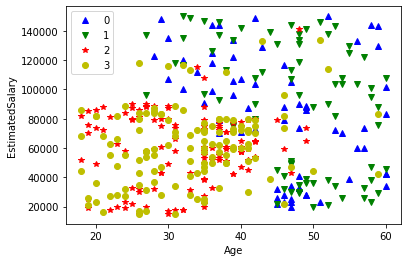

In [11]:
plt.plot(df[(df['Purchased'] == 1) * (df['Gender'] == 'Male')]['Age'], 
         df[(df['Purchased'] == 1) * (df['Gender'] == 'Male')]['EstimatedSalary'], 'b^', label='0')
plt.plot(df[(df['Purchased'] == 1) * (df['Gender'] == 'Female')]['Age'],
         df[(df['Purchased'] == 1) * (df['Gender'] == 'Female')]['EstimatedSalary'], 'gv', label='1')

plt.plot(df[(df['Purchased'] == 0) * (df['Gender'] == 'Male')]['Age'], 
         df[(df['Purchased'] == 0) * (df['Gender'] == 'Male')]['EstimatedSalary'], 'r*', label='2')
plt.plot(df[(df['Purchased'] == 0) * (df['Gender'] == 'Female')]['Age'],
         df[(df['Purchased'] == 0) * (df['Gender'] == 'Female')]['EstimatedSalary'], 'yo', label='3')

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [12]:
#binary
df = pd.get_dummies(df,prefix=["Gender"],columns=["Gender"],drop_first=True)

In [13]:
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [14]:
# if the purchase col is the last col
# X = df.to_numpy()
# y = X[:, -1]
# X = X[:, :-1]

# now the purchase col isn't the last one
# y = np.array(df['Purchased'])
y = df.Purchased.to_numpy()
df.drop('Purchased',axis=1,inplace=True)
X = df.to_numpy()
X.shape, y.shape

((400, 3), (400,))

In [15]:
X2 = X
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]])

In [16]:
# normalizing
# calculate for each sample of a feature > 3 col > 3D array
X2.mean(axis=0)

array([3.76550e+01, 6.97425e+04, 4.90000e-01])

In [17]:
# for each col we have on normalization > scale it mean,std
X2 = (X2 - X2.mean(axis=0)) / X2.std(axis=0)
X2, X2.min(axis=0), X2.min(), X2.max(axis=0), X2.mean(), X2.std()

(array([[-1.78179743, -1.49004624,  1.02020406],
        [-0.25358736, -1.46068138,  1.02020406],
        [-1.11320552, -0.78528968, -0.98019606],
        ...,
        [ 1.17910958, -1.46068138, -0.98019606],
        [-0.15807423, -1.07893824,  1.02020406],
        [ 1.08359645, -0.99084367, -0.98019606]]),
 array([-1.87731056, -1.60750566, -0.98019606]),
 -1.8773105578331641,
 array([2.13424088, 2.35674998, 1.02020406]),
 -5.329070518200751e-17,
 1.0)

In [18]:
X3 = X
from sklearn import preprocessing
X3 = preprocessing.normalize(X3,axis=0)
X3, X3.min(axis=0)
# lots of 0 maybe it is not good > mean and std is better

(array([[0.02430697, 0.01224028, 0.07142857],
        [0.044776  , 0.01288451, 0.07142857],
        [0.03326217, 0.02770169, 0.        ],
        ...,
        [0.06396572, 0.01288451, 0.        ],
        [0.04605532, 0.02125944, 0.07142857],
        [0.0626864 , 0.02319212, 0.        ]]),
 array([0.02302766, 0.00966338, 0.        ]))

In [19]:
########################################important
X4 = X
# z-score normalization > for noisy data is better > it isn't between 0 to 1
X4 = (X4 - X4.mean(axis=0)) / X4.std(axis=0)

# min-Max normalization > by scaling to 0 to 1 may some data values losses
X4 = (X4 - X4.min(axis=0)) / (X4.max(axis=0) - X4.min(axis=0))

In [20]:
X = X2
clf = LogisticRegression()  

In [21]:
clf.fit(X, y)

LogisticRegression()

In [22]:
# without normalization > 0.62
clf.score(X, y)

0.8525

In [23]:
h = clf.predict(X)
print(h)

# bunary cross enropy score
np.mean(h == y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1]


0.8525

In [24]:
clf.predict_proba(X)[:3]

array([[0.99882286, 0.00117714],
       [0.96109906, 0.03890094],
       [0.99093913, 0.00906087]])

In [25]:
print(clf.predict_proba(X).shape)

# axis=0 > all samples of a feature
# axis=1 > each sample independently
np.sum(clf.predict_proba(X),axis=1)

(400, 2)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [26]:
# finding the cross enropy error - just we did in to find MSE
# the error for each class calculates separately
h = clf.predict_proba(X)[:, 1]
-np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

0.34546308142415627

In [29]:
h = clf.predict_proba(X)[:,0]
-np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

2.418454850379322